In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier

In [3]:
sampleTrain=['i will call you tonight','please help me....','Please call a cab please!']

In [4]:
y=[0,1,0]  #taking ham statemet as 0 and spam statement as 1

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
tonumeric=CountVectorizer()                #it helps convert text into numeric by creating vocabulary

In [6]:
tonumeric.fit(sampleTrain)

CountVectorizer()

In [8]:
tonumeric.get_feature_names()

['cab', 'call', 'help', 'me', 'please', 'tonight', 'will', 'you']

In [10]:
sampleTrain_dtm=tonumeric.transform(sampleTrain)
sampleTrain_dtm   #it is creating a sparse metrix which we cannt read,so we convert it into dense matrix

<3x8 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [11]:
sampleTrain_dtm.toarray()  #converting into dense array

array([[0, 1, 0, 0, 0, 1, 1, 1],
       [0, 0, 1, 1, 1, 0, 0, 0],
       [1, 1, 0, 0, 2, 0, 0, 0]], dtype=int64)

In [12]:
pd.DataFrame(sampleTrain_dtm.toarray(),columns=tonumeric.get_feature_names())

,cab,call,help,me,please,tonight,will,you
0,0,1,0,0,0,1,1,1
1,0,0,1,1,1,0,0,0
2,1,1,0,0,2,0,0,0


In [ ]:
#build a model to predict the target

In [13]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(sampleTrain_dtm,y)

KNeighborsClassifier(n_neighbors=1)

In [20]:
#test text for model validation
sampleTest=["Don't call please"]

In [21]:
#to check first transfrom in dtm
sampleTest_dtm=tonumeric.transform(sampleTest)
sampleTest_dtm.toarray()

array([[0, 1, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [22]:
tonumeric.get_feature_names()

['cab', 'call', 'help', 'me', 'please', 'tonight', 'will', 'you']

In [23]:
knn.predict(sampleTest_dtm)

array([0])

In [ ]:
#sms data set

In [24]:
df=pd.read_table('C:\\Users\\This PC\\Downloads\\NLP_Artifacts\\NLP_Artifacts\\sms.tsv',header=None,names=['label','message'])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
df.shape

(5572, 2)

In [28]:
#label is categorical we need to convert into numerical
df['label_num']=df.label.map({'ham':0,'spam':1})

In [29]:
df.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [31]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [32]:
X=df.message
y=df.label_num
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [36]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=4,train_size=0.75)

In [37]:
tonumeric=CountVectorizer()
tonumeric.fit(X)  #create vocabulary

CountVectorizer()

In [41]:
X_train_dtm=tonumeric.transform(xtrain)
X_train_dtm

<4179x8713 sparse matrix of type '<class 'numpy.int64'>'
	with 55347 stored elements in Compressed Sparse Row format>

In [47]:
tonumeric.get_feature_names()

['00',
 '000',
 '000pes',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '078498',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '084

In [42]:
X_train_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [46]:
X_test_dtm=tonumeric.transform(xtest)
X_test_dtm

<1393x8713 sparse matrix of type '<class 'numpy.int64'>'
	with 18822 stored elements in Compressed Sparse Row format>

In [48]:
from sklearn.naive_bayes import MultinomialNB  #creating model

In [49]:
nb=MultinomialNB()
nb.fit(X_train_dtm,ytrain)

MultinomialNB()

In [50]:
ypred=nb.predict(X_test_dtm)

In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score

In [52]:
confusion_matrix(ytest,ypred)

array([[1166,   18],
       [  13,  196]], dtype=int64)

In [53]:
yprob=nb.predict_proba(X_test_dtm)[:,1]
yprob

array([4.88075360e-15, 2.14014230e-03, 1.08921810e-02, ...,
       1.64689328e-05, 5.56170837e-11, 4.33925798e-15])

In [55]:
roc_auc_score(ytest,yprob)

0.9845548299495667

In [56]:
accuracy_score(ytest,ypred)

0.9777458722182341

In [ ]:
#comparing 

In [57]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [58]:
lr.fit(X_train_dtm,ytrain)

LogisticRegression()

In [59]:
ypred1=lr.predict(X_test_dtm)

In [60]:
lr.score(X_test_dtm,ytest)

0.9834888729361091

In [61]:
accuracy_score(ytest,ypred1)

0.9834888729361091

In [62]:
yprob1=lr.predict_proba(X_test_dtm)[:,1]
roc_auc_score(ytest,yprob1)

0.9920996055864477

In [ ]:
#TF_IDF

In [64]:
sampleTrain

['i will call you tonight', 'please help me....', 'Please call a cab please!']

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [66]:
tonumericTFIDF=TfidfVectorizer()

In [67]:
tonumericTFIDF.fit(sampleTrain)

TfidfVectorizer()

In [68]:
tonumericTFIDF.get_feature_names()

['cab', 'call', 'help', 'me', 'please', 'tonight', 'will', 'you']

In [69]:
sampletrainTFIDF_dtm=tonumericTFIDF.transform(sampleTrain)

In [71]:
sampletrainTFIDF_dtm.toarray()

array([[0.        , 0.40204024, 0.        , 0.        , 0.        ,
        0.52863461, 0.52863461, 0.52863461],
       [0.        , 0.        , 0.62276601, 0.62276601, 0.4736296 ,
        0.        , 0.        , 0.        ],
       [0.50689001, 0.38550292, 0.        , 0.        , 0.77100584,
        0.        , 0.        , 0.        ]])

In [72]:
pd.DataFrame(sampletrainTFIDF_dtm.toarray(),columns=tonumericTFIDF.get_feature_names())

,cab,call,help,me,please,tonight,will,you
0,0.00000,0.402040,0.000000,0.000000,0.000000,0.528635,0.528635,0.528635
1,0.00000,0.000000,0.622766,0.622766,0.473630,0.000000,0.000000,0.000000
2,0.50689,0.385503,0.000000,0.000000,0.771006,0.000000,0.000000,0.000000


In [73]:
sampleTrain

['i will call you tonight', 'please help me....', 'Please call a cab please!']

In [ ]:
#stemming and lemmatization
#finne tuning

In [79]:
tonumericTFIDF=TfidfVectorizer(stop_words='english') # it remove english words
tonumericTFIDF.fit(xtrain)

TfidfVectorizer(stop_words='english')

In [80]:
len(tonumericTFIDF.get_feature_names())

7240

In [82]:
tonumericTFIDF=TfidfVectorizer(ngram_range=(1,2)) #ngram range means como of uni and bigram

In [83]:
tonumericTFIDF.fit(xtrain)

TfidfVectorizer(ngram_range=(1, 2))

In [86]:
len(tonumericTFIDF.get_feature_names())

41202

In [ ]:
#max_df ignore terms appear in more tha 75% of documents

In [87]:
tonumericTFIDF=TfidfVectorizer(max_df=0.75)
tonumericTFIDF.fit(xtrain)

TfidfVectorizer(max_df=0.75)

In [88]:
len(tonumericTFIDF.get_feature_names())

7504

In [ ]:
#min_df keep terms that appear in atleast 2 documents

In [89]:
tonumericTFIDF=TfidfVectorizer(min_df=2)
tonumericTFIDF.fit(xtrain)
len(tonumericTFIDF.get_feature_names())

3431

In [ ]:
#word Cloud

In [92]:
from wordcloud import WordCloud

In [91]:
df.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


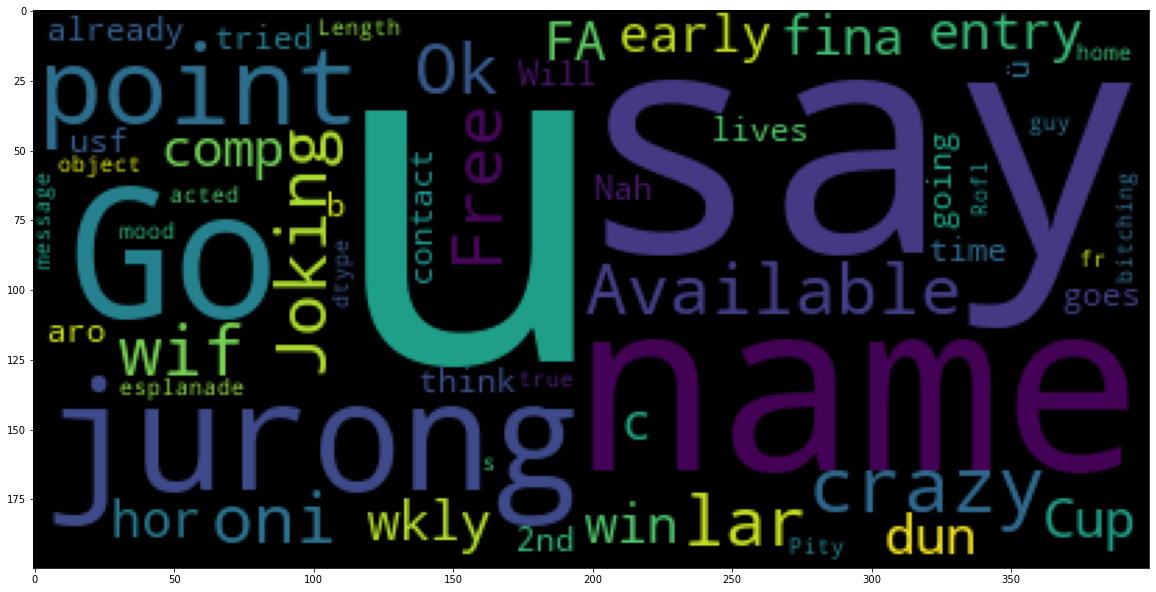

In [96]:
wc=WordCloud()
wc.generate(str(df['message']))
plt.figure(figsize=(20,20))
plt.imshow(wc)
plt.show()

In [ ]:
#lemmatization and stemming

In [97]:
import nltk

In [98]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\This
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [99]:
from nltk.stem import LancasterStemmer,PorterStemmer

In [100]:
porter=PorterStemmer()
lancaster=LancasterStemmer()

In [102]:
print(porter.stem('cats'))
print(porter.stem('troubling'))
print(porter.stem('tickling'))
print(porter.stem('fickling'))

cat
troubl
tickl
fickl


In [103]:
s='pythoners are very intelligent and work very pytholy and now they are pythoning their way to success.'
porter.stem(s)

'pythoners are very intelligent and work very pytholy and now they are pythoning their way to success.'

In [105]:
from nltk.tokenize import sent_tokenize,word_tokenize
def stem(sentence):
    token_words=word_tokenize(s)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)
x=stem(s)
print(x)

python are veri intellig and work veri pytholi and now they are python their way to success . 


In [106]:
from textblob import TextBlob
sent=TextBlob(s)
print(' '.join([porter.stem(word) for word in sent.words]))

python are veri intellig and work veri pytholi and now they are python their way to success


In [ ]:
#sentiment calculation

In [107]:
from textblob import TextBlob

In [108]:
t='i hate everything that goes in my ear'

In [109]:
r=TextBlob(t)

In [110]:
r.sentiment

Sentiment(polarity=-0.8, subjectivity=0.9)

In [ ]:
#Data Scraping

In [111]:
import requests 
from bs4 import BeautifulSoup
import os

In [112]:
url = 'https://inshorts.com/en/read/world'

In [114]:
news_data=[]
news_category=url.split('/')
news_category

['https:', '', 'inshorts.com', 'en', 'read', 'world']

In [115]:
news_category=news_category[-1]

In [116]:
data=requests.get(url)
data.content

b'<!doctype html>\n<html lang="en">\n\n<head>\n  <meta charset="utf-8" />\n  <style>\n    /* The Modal (background) */\n    .modal_contact {\n        display: none; /* Hidden by default */\n        position: fixed; /* Stay in place */\n        z-index: 8; /* Sit on top */\n        left: 0;\n        top: 0;\n        width: 100%; /* Full width */\n        height: 100%;\n        overflow: auto; /* Enable scroll if needed */\n        background-color: rgb(0,0,0); /* Fallback color */\n        background-color: rgba(0,0,0,0.4); /* Black w/ opacity */\n    }\n\n    /* Modal Content/Box */\n    .modal-content {\n        background-color: #fefefe;\n        margin: 15% auto;\n        padding: 20px !important;\n        padding-top: 0 !important;\n        /* border: 1px solid #888; */\n        text-align: center;\n        position: relative;\n        border-radius: 6px;\n    }\n\n    /* The Close Button */\n    .close {\n      left: 90%;\n      color: #aaa;\n      float: right;\n      font-size: 

In [117]:
soup=BeautifulSoup(data.content,'html.parser')

In [118]:
news_articles = [{'news_headline': headline.find('span', attrs={'itemprop': 'headline'}).string,
                  'news_article': article.find('div', attrs={'itemprop': 'articleBody'}).string,
                  'news_category': news_category} 
                 for headline, article in zip(soup.find_all('div', 
                                                            class_ = ['news-card-title news-right-box']), 
                                              soup.find_all('div', class_=['news-card-content news-right-box']))]

In [119]:
news_data.extend(news_articles)
news_data

[{'news_headline': "India's COVID-19 crisis a warning for low & middle-income nations: IMF",
  'news_article': 'The International Monetary Fund has said that the ongoing second COVID-19 wave in India, following a "terrible wave" in Brazil, is a "sign the worst may be yet to come" for developing countries. "India is a warning of possible events in other low and middle-income countries that so far have seemingly escaped the pandemic, including in Africa," the IMF added.',
  'news_category': 'world'},
 {'news_headline': "What is 'vaccine tourism' and can Indians go abroad for Covid-19 vaccine shots?",
  'news_article': "Vaccine tourism usually refers to visiting another country or state to get a vaccine. Recently, an agency launched a ₹1.3-lakh tour package promising Indian tourists trip to Russia and two Sputnik V vaccine doses. Several Indians recently visited Dubai to avail China's Sinopharm vaccine shots. It's currently not illegal to travel abroad to get vaccinated if air travel is a

In [120]:
df1=pd.DataFrame(news_data)

In [122]:
df1.head(3)

,news_headline,news_article,news_category
0,India's COVID-19 crisis a warning for low & mi...,The International Monetary Fund has said that ...,world
1,What is 'vaccine tourism' and can Indians go a...,Vaccine tourism usually refers to visiting ano...,world
2,Pak min accused of anti-Semitism over intervie...,Israel has expressed regret over Pakistan Fore...,world


In [ ]:
#creating user defined data

In [123]:
urls_list = ['https://inshorts.com/en/read/technology',
             'https://inshorts.com/en/read/sports',
             'https://inshorts.com/en/read/world']

def datasetPrepare(urls_list):
    news_data = []
    for url in urls_list:
        news_category = url.split('/')[-1]
        data = requests.get(url)
        soup = BeautifulSoup(data.content, 'html.parser')
        news_articles = [{'news_headline': headline.find('span', attrs={"itemprop": "headline"}).string,
                          'news_article': article.find('div', attrs={"itemprop": "articleBody"}).string,
                          'news_category': news_category}
                         
                            for headline, article in 
                             zip(soup.find_all('div', class_=["news-card-title news-right-box"]),
                                 soup.find_all('div', class_=["news-card-content news-right-box"]))
                        ]
        news_data.extend(news_articles) 
    df =  pd.DataFrame(news_data)
    df = df[['news_headline', 'news_article', 'news_category']]
    return df    

In [124]:
news_df = datasetPrepare(urls_list)

In [125]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   news_headline  75 non-null     object
 1   news_article   75 non-null     object
 2   news_category  75 non-null     object
dtypes: object(3)
memory usage: 1.9+ KB


In [126]:
news_df.head(5)

,news_headline,news_article,news_category
0,Amazon shuts construction at US site after 7 n...,Amazon has halted construction at a facility i...,technology
1,Leaked data including phone numbers from 18 cr...,Leaked data from around 18 crore orders from D...,technology
2,I haven't and won't sell any Dogecoin: Elon Musk,Tesla CEO Elon Musk on Thursday said he has no...,technology
3,Microsoft of 2021 very different from 2000: Na...,Microsoft CEO Satya Nadella has said that powe...,technology
4,Apple's head of software admits Macs have 'una...,"Craig Federighi, Apple's Senior VP of Software...",technology


In [127]:
news_df.news_category.value_counts()

world         25
sports        25
technology    25
Name: news_category, dtype: int64

SyntaxError: invalid syntax (<ipython-input-136-bb456caeb370>, line 1)

In [128]:
#Text Wrangling and preprocessing

In [131]:
import spacy 
import nltk
from nltk.tokenize.toktok import ToktokTokenizer

In [135]:
nlp=spacy.load("english")

OSError: [E050] Can't find model 'english'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
nltk.download('stopwords')

In [ ]:
tokenizer=ToktokTokenizer